##  Flight Price Prediction


FEATURES:

- Airline: The name of the airline.


- Date_of_Journey: The date of the journey


- Source: The source from which the service begins.


- Destination: The destination where the service ends.


- Dep_Time_hr: The hour when the journey starts from the source.


- Dep_Time_min: The minutes when the journey starts from the source.


- Arr_Time_hr: Hour of arrival at the destination.


- Arr_Time_min: The minutes when the flight arrival at the destination.


- Duration: Total duration of the flight.


- Total_Stops: Total stops between the source and destination.


- Price: The price of the ticket

### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import r2_score

import joblib
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the dataset
df= pd.read_excel('Flight_data1.xlsx')
pd.set_option('display.max_rows', None)

Checking the first 5 rows 

In [3]:
df.head(5)

,Unnamed: 0,Airline,Date_of_Journey,Source,Destination,Dep_Time_hour,Dep_Time_min,Arr_Time_hour,Arr_Time_min,Duration,Total_Stops,Price
0,0,GO FIRST,2021-10-24,Delhi,Bangalore,19,45,22,22,02h 35m,non-stop,7424
1,1,SpiceJet,2021-10-24,Delhi,Bangalore,20,5,23,23,03h 05m,non-stop,7425
2,2,AirAsia,2021-10-24,Delhi,Bangalore,18,40,21,21,02h 50m,non-stop,7426
3,3,Vistara,2021-10-24,Delhi,Bangalore,20,40,23,23,02h 40m,non-stop,7425
4,4,Vistara,2021-10-24,Delhi,Bangalore,19,50,22,22,02h 50m,non-stop,7425


Checking the last 5 rows

In [4]:
df.tail(5)

,Unnamed: 0,Airline,Date_of_Journey,Source,Destination,Dep_Time_hour,Dep_Time_min,Arr_Time_hour,Arr_Time_min,Duration,Total_Stops,Price
8664,8664,Vistara,2021-11-03,Chennai,Cochin,9,45,9,9,23h 20m,2+-stop,20561
8665,8665,Vistara,2021-11-03,Chennai,Cochin,9,45,9,9,23h 20m,2+-stop,20561
8666,8666,Vistara,2021-11-03,Chennai,Cochin,9,45,9,9,23h 20m,2+-stop,20561
8667,8667,Vistara,2021-11-03,Chennai,Cochin,7,0,19,19,12h 10m,2+-stop,21632
8668,8668,Air India,2021-11-03,Chennai,Cochin,17,0,17,17,24h 20m,1-stop,26673


####  Shape of the dataset:

In [5]:
print("The dataset shape is : ",df.shape)

The dataset shape is :  (8669, 12)


We have 8869 rows and 12 columns in the dataset.

In [6]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8669 entries, 0 to 8668
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       8669 non-null   int64         
 1   Airline          8669 non-null   object        
 2   Date_of_Journey  8669 non-null   datetime64[ns]
 3   Source           8669 non-null   object        
 4   Destination      8669 non-null   object        
 5   Dep_Time_hour    8669 non-null   int64         
 6   Dep_Time_min     8669 non-null   int64         
 7   Arr_Time_hour    8669 non-null   int64         
 8   Arr_Time_min     8669 non-null   int64         
 9   Duration         8669 non-null   object        
 10  Total_Stops      8669 non-null   object        
 11  Price            8669 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(5)
memory usage: 812.8+ KB


In our  dataset we have  6 object , 1 datetime  and 5 integer datatype columns .

#### Checking  Null Values :

In [7]:
#Training data null values check
df.isnull().sum()

Unnamed: 0         0
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time_hour      0
Dep_Time_min       0
Arr_Time_hour      0
Arr_Time_min       0
Duration           0
Total_Stops        0
Price              0
dtype: int64

In our set no null values present

<AxesSubplot:>

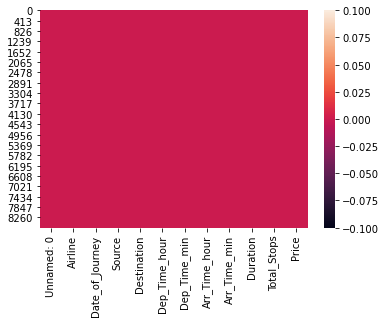

In [8]:
#Lets represent graphically
sns.heatmap(df.isnull())

Here we can see that no null values are present in the dataset.

In [9]:
#Selecting the date and month from the Journey date
df['journey_day']=df['Date_of_Journey'].dt.day
df['journey_month']=df['Date_of_Journey'].dt.month

In [12]:
df.head()

,Unnamed: 0,Airline,Date_of_Journey,Source,Destination,Dep_Time_hour,Dep_Time_min,Arr_Time_hour,Arr_Time_min,Duration,Total_Stops,Price,journey_day,journey_month
0,0,GO FIRST,2021-10-24,Delhi,Bangalore,19,45,22,22,02h 35m,non-stop,7424,24,10
1,1,SpiceJet,2021-10-24,Delhi,Bangalore,20,5,23,23,03h 05m,non-stop,7425,24,10
2,2,AirAsia,2021-10-24,Delhi,Bangalore,18,40,21,21,02h 50m,non-stop,7426,24,10
3,3,Vistara,2021-10-24,Delhi,Bangalore,20,40,23,23,02h 40m,non-stop,7425,24,10
4,4,Vistara,2021-10-24,Delhi,Bangalore,19,50,22,22,02h 50m,non-stop,7425,24,10


Now dropping the 'Date_of_Journey' column a now there is no use of it.

In [13]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [14]:
df['Price']=df['Price'].astype(float)

In [15]:
#In Total_Stops column "non-stop" can be replaced by "0 stop"
df['Total_Stops']=df['Total_Stops'].replace('non-stop','0-stop')

In [16]:
#In Total_Stops column "2+-stop" can be replaced by "2 stop"
df['Total_Stops']=df['Total_Stops'].replace('2+-stop','2-stop')

In [17]:
#Lets store the values of Total_stops columns into stop column and store only numeric part
df['Stop'] = df['Total_Stops'].str.split('-').str[0]
df['Stop']=df['Stop'].astype(int)
df=df.drop(['Total_Stops'],axis=1)

In [18]:
df.head()

,Unnamed: 0,Airline,Source,Destination,Dep_Time_hour,Dep_Time_min,Arr_Time_hour,Arr_Time_min,Duration,Price,journey_day,journey_month,Stop
0,0,GO FIRST,Delhi,Bangalore,19,45,22,22,02h 35m,7424.0,24,10,0
1,1,SpiceJet,Delhi,Bangalore,20,5,23,23,03h 05m,7425.0,24,10,0
2,2,AirAsia,Delhi,Bangalore,18,40,21,21,02h 50m,7426.0,24,10,0
3,3,Vistara,Delhi,Bangalore,20,40,23,23,02h 40m,7425.0,24,10,0
4,4,Vistara,Delhi,Bangalore,19,50,22,22,02h 50m,7425.0,24,10,0


In [19]:
#Lets drop this Unnamed column
df=df.drop(['Unnamed: 0'],axis=1)

Lets Set our duration column ,Separate Duration hours and minute from Duration and convert into int vlaues as this column in object datatype

In [20]:
duration=list(df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]: # Check if duration contains only hour
             duration[i]=duration[i] + ' 0m' # Adds 0 minute
        else:
             duration[i]='0h '+ duration[i]

In [21]:
df['Duration']=duration
df.head()

,Airline,Source,Destination,Dep_Time_hour,Dep_Time_min,Arr_Time_hour,Arr_Time_min,Duration,Price,journey_day,journey_month,Stop
0,GO FIRST,Delhi,Bangalore,19,45,22,22,02h 35m,7424.0,24,10,0
1,SpiceJet,Delhi,Bangalore,20,5,23,23,03h 05m,7425.0,24,10,0
2,AirAsia,Delhi,Bangalore,18,40,21,21,02h 50m,7426.0,24,10,0
3,Vistara,Delhi,Bangalore,20,40,23,23,02h 40m,7425.0,24,10,0
4,Vistara,Delhi,Bangalore,19,50,22,22,02h 50m,7425.0,24,10,0


In [22]:
def hour(x):
    return x.split(' ')[0][0:-1]

def minutes(x):
    return x.split(' ')[1][0:-1]

In [23]:
df['dur_hour']=df['Duration'].apply(hour)

In [24]:
df['dur_min']=df['Duration'].apply(minutes)

In [25]:
df.drop('Duration',axis=1,inplace=True)

In [26]:
#lets check the datatype
df.dtypes

Airline           object
Source            object
Destination       object
Dep_Time_hour      int64
Dep_Time_min       int64
Arr_Time_hour      int64
Arr_Time_min       int64
Price            float64
journey_day        int64
journey_month      int64
Stop               int32
dur_hour          object
dur_min           object
dtype: object

As dur_min and Dur_hour in object we convert the dtype into int datatype

In [27]:
#Converting duration minute and hours into int datatype
df['dur_hour'] = df['dur_hour'].astype(int)
df['dur_min'] = df['dur_min'].astype(int)
df.dtypes

Airline           object
Source            object
Destination       object
Dep_Time_hour      int64
Dep_Time_min       int64
Arr_Time_hour      int64
Arr_Time_min       int64
Price            float64
journey_day        int64
journey_month      int64
Stop               int32
dur_hour           int32
dur_min            int32
dtype: object

Now all our columns are in right datatype and also there are no null values present in the dataset

In [28]:
#Checking with statistically
df.describe()

,Dep_Time_hour,Dep_Time_min,Arr_Time_hour,Arr_Time_min,Price,journey_day,journey_month,Stop,dur_hour,dur_min
count,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000
mean,12.732726,25.636752,15.429577,15.429577,11104.090322,20.967355,10.267159,0.926981,11.610451,27.703311
std,5.434339,17.555651,5.860459,5.860459,4509.632353,11.747791,0.442502,0.442699,8.074037,17.401323
min,0.000000,0.000000,0.000000,0.000000,4451.000000,1.000000,10.000000,0.000000,1.000000,0.000000
25%,8.000000,10.000000,11.000000,11.000000,7603.000000,3.000000,10.000000,1.000000,6.000000,10.000000
50%,12.000000,25.000000,17.000000,17.000000,10604.000000,27.000000,10.000000,1.000000,10.000000,30.000000
75%,18.000000,40.000000,20.000000,20.000000,13168.000000,29.000000,11.000000,1.000000,16.000000,45.000000
max,23.000000,55.000000,23.000000,23.000000,38598.000000,31.000000,11.000000,2.000000,46.000000,55.000000


Inferences:

here the maximum price of ticket is 38598 and the minimum is 4451 in rupees.

The distribution in Price is not normal as data is positively skewed

#### Exploratory Data Analysis

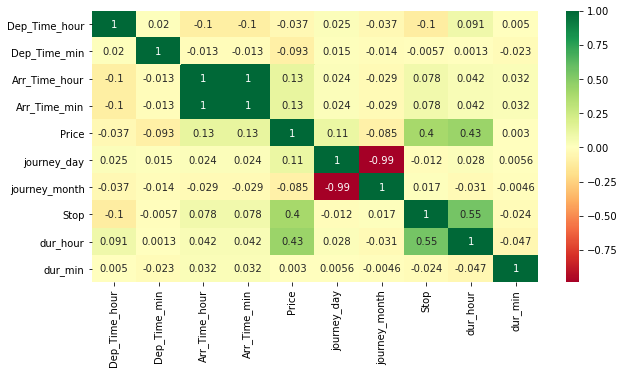

In [29]:
#Lets see the graphical representation of the correlation
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,5))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

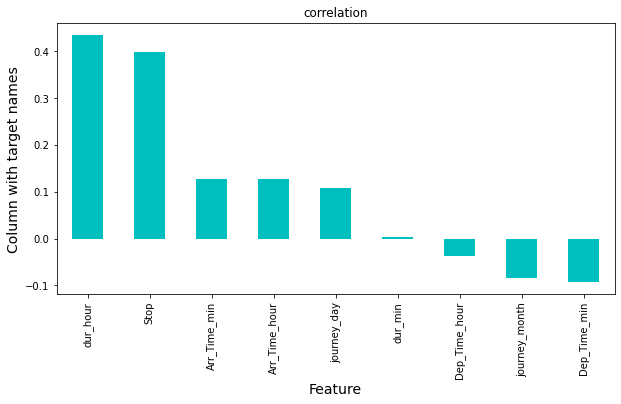

In [30]:
plt.figure(figsize=(10,5))
df.corr()['Price'].sort_values(ascending = False).drop(['Price']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Column with target names',fontsize=14)
plt.title('correlation')
plt.show()

Observations :

- Travelling duration hours , number of stops are highly positively correlated with the Flight price.

- Also depature time is negatively correlated with price.


#### Categorical columns

In [31]:
column=[column for column in df.columns if df[column].dtype=='object']
column

['Airline', 'Source', 'Destination']

So here we have total 3 columns of object in datatset .

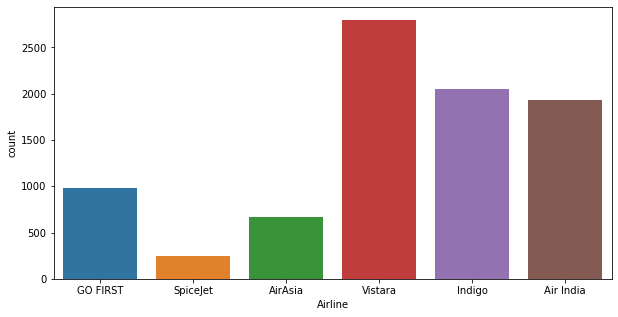

In [32]:
#lets count the different Airplanes data we have
plt.figure(figsize=(10,5))
sns.countplot(x="Airline",data=df)
plt.show()

Here the most of the Airline were Vistara airlines after that Indigo and Air India. The Spicejet airlines are very less in compares to others.

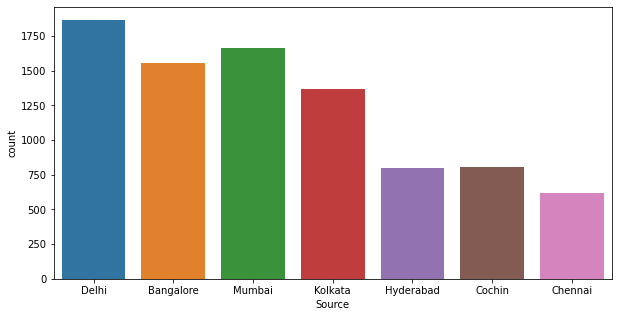

In [33]:
#lets count the different Sources data we have
plt.figure(figsize=(10,5))
sns.countplot(x="Source",data=df)
plt.show()

Here we can see that Maximum flights are generally from Delhi and Mumbai.

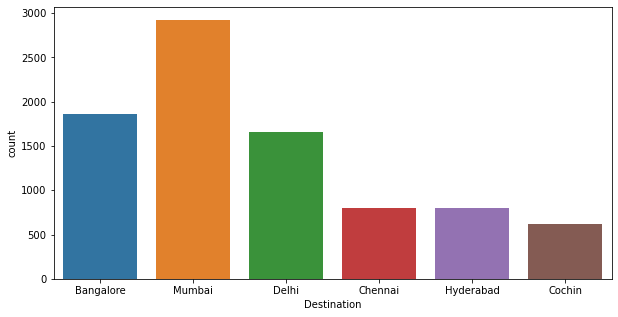

In [34]:
#lets count the different Destination data we have
plt.figure(figsize=(10,5))
sns.countplot(x="Destination",data=df)
plt.show()

- The maximum number of flights are headed to Mumbai
- and very less headed to cochin

<AxesSubplot:xlabel='Stop', ylabel='count'>

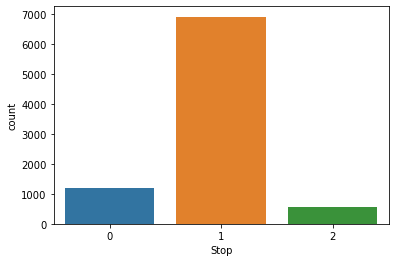

In [35]:
sns.countplot(df['Stop'])
#there are more flights which have 1 stops

- Maximum number of flights have 1 stop before they reach to the destination

### Airline vs Price Analysis

<Figure size 720x720 with 0 Axes>

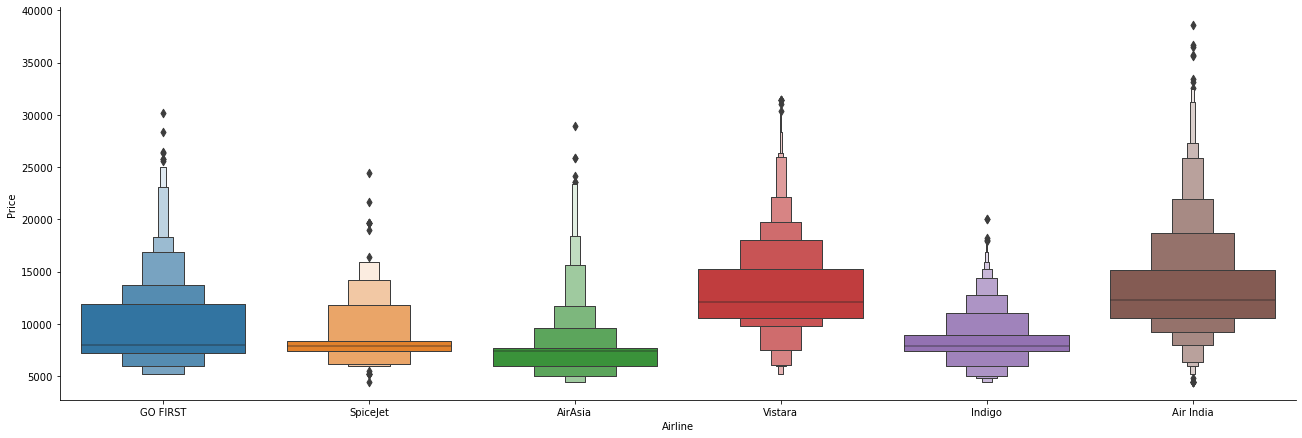

In [36]:
#lets check which airline is expensive based on average price
plt.figure(figsize=(10,10))
sns.catplot(x="Airline",y="Price",data=df,kind='boxen',height=6,aspect=3)
plt.show()

- The Price of the Air India is very high and after that Vistara which almost have same price like Air India airlines.

- The price of AirAsia, Indigo, and Spice jet are less and  much less in comparison to Vistara and Air India.

### Perform Source vs Airline Analysis

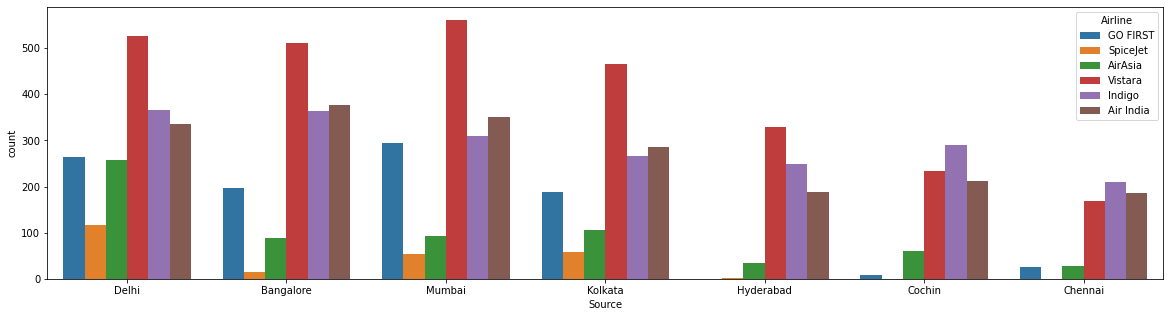

In [37]:
#Lets check the most popular flight region wise
plt.figure(figsize=(20,5))
sns.countplot(x="Source",hue="Airline",data=df)
plt.show()

- The maximum number of flights are take off from the Mumbai and they are of Vistara Airways
- Vistara airways are the maximum nuber of flights which take off from different sources/cites
- In chennai and cochin INdia Airlines flight takeoff more.

#### Perform Source vs Price Analysis

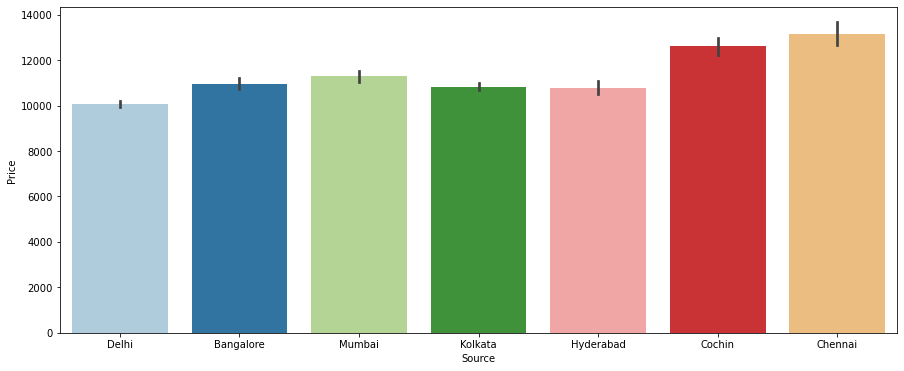

In [45]:
#Lets check from which region averge price of the flight was more
plt.figure(figsize=(15,6))
sns.barplot(x="Source",y="Price",data=df,palette='Paired')
plt.show()

Observation:

- The price of flights from Chennai is very high

- after that Cochin flights have very high price

#### Perform Total_Stops vs Price Analysis

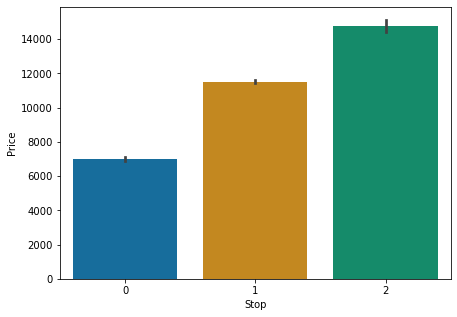

In [44]:
#Lets check from which stops and averge price of the flight was more
plt.figure(figsize=(7,5))
sns.barplot(x="Stop",y="Price",data=df,palette='colorblind')
plt.show()

The flights which have 2 stops have very high price.

- i.e If Number of stops increase ticket price also increases.

**Do airfares change frequently? Do they move in small increments or in large jumps? Do they tend to go up or down over time?**

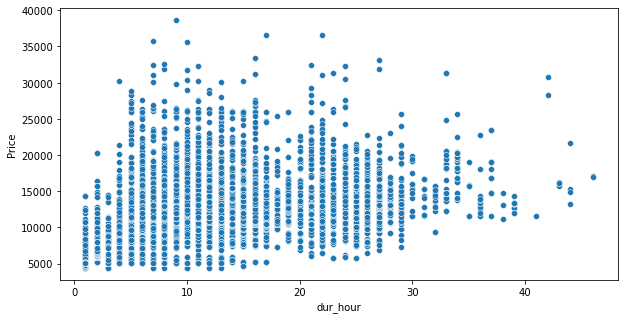

In [40]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['dur_hour'],y=df['Price'])
plt.show()

<AxesSubplot:xlabel='dur_hour', ylabel='Price'>

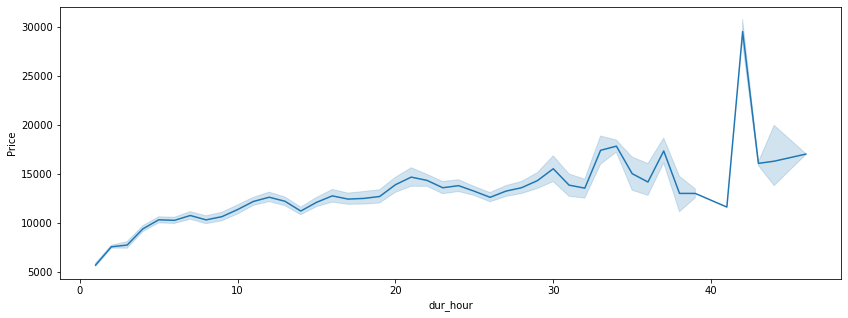

In [41]:
plt.figure(figsize=(14,5))
sns.lineplot(x=df['dur_hour'],y=df['Price'])

Observations:

-  airfares are change frequently to maximize profits and fill more seats .They change according to increase in travelling hours.

- Airfares move in small increments .

- Here we can see that ticket-fares tend to go up with time.

**What is the best time to buy so that the consumer can save the most by taking the least risk? Does price increase as we get near to departure date?**

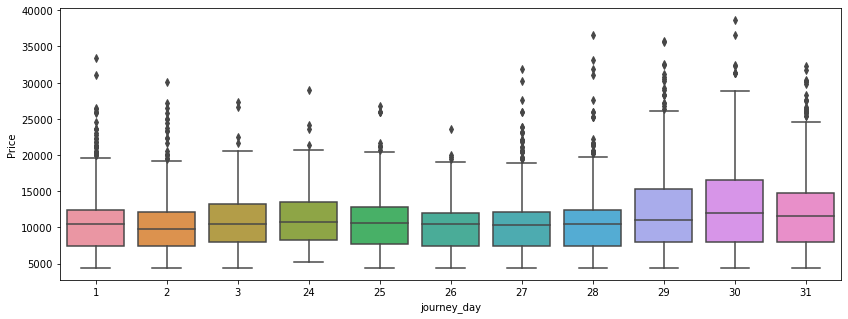

In [42]:

plt.figure(figsize=(14,5))
sns.boxplot(x=df['journey_day'],y=df['Price'])
plt.show()

Observation:
As I collected data from 24th October to 3rd of November Here we can see that the :

- Here we can see that the price increased as we get near to the departure date.

- The best time for booking flight ticket for travelling to save the most by taking the least risk, is as early as you can like from the travelling date like 10-20 days or more than that.Then you can save the money by taking the least risk.


**Are morning flights expensive?**

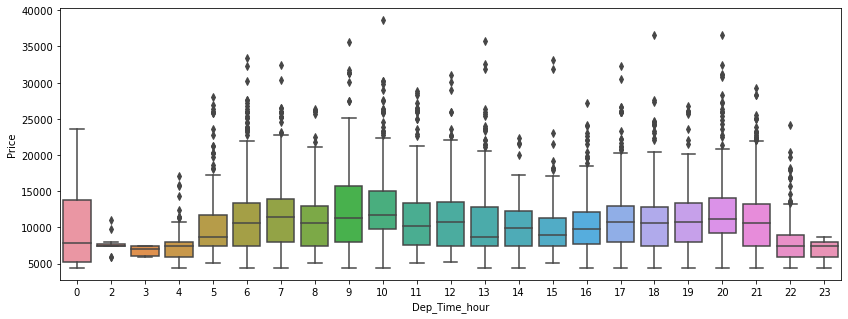

In [43]:
plt.figure(figsize=(14,5))
sns.boxplot(x=df['Dep_Time_hour'],y=df['Price'])
plt.show()

Observations:

- The early morning flights are less expensive, after that increases.

### Feature Engineering

#### Label encoding

In [41]:
#lets use Label encodig to covert object datatypes to integers
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["Airline"]=encoder.fit_transform(df['Airline'])
df["Source"]=encoder.fit_transform(df['Source'])
df["Destination"]=encoder.fit_transform(df['Destination'])

In [42]:
df.head()

,Airline,Source,Destination,Dep_Time_hour,Dep_Time_min,Arr_Time_hour,Arr_Time_min,Price,journey_day,journey_month,Stop,dur_hour,dur_min
0,2,3,0,19,45,22,22,7424.0,24,10,0,2,35
1,4,3,0,20,5,23,23,7425.0,24,10,0,3,5
2,1,3,0,18,40,21,21,7426.0,24,10,0,2,50
3,5,3,0,20,40,23,23,7425.0,24,10,0,2,40
4,5,3,0,19,50,22,22,7425.0,24,10,0,2,50


In [43]:
df.shape

(8669, 13)

### Feature Selection :

In [44]:
#lets divide the train dataset into input and output
df_x=df.drop(columns=["Price"])
y=df[["Price"]]

In [65]:
df.shape

(8669, 13)

In [48]:
df.dtypes

Airline            int32
Source             int32
Destination        int32
Dep_Time_hour      int64
Dep_Time_min       int64
Arr_Time_hour      int64
Arr_Time_min       int64
Price            float64
journey_day        int64
journey_month      int64
Stop               int32
dur_hour           int32
dur_min            int32
dtype: object

In [49]:
df_x.head()

,Airline,Source,Destination,Dep_Time_hour,Dep_Time_min,Arr_Time_hour,Arr_Time_min,journey_day,journey_month,Stop,dur_hour,dur_min
0,2,3,0,19,45,22,22,24,10,0,2,35
1,4,3,0,20,5,23,23,24,10,0,3,5
2,1,3,0,18,40,21,21,24,10,0,2,50
3,5,3,0,20,40,23,23,24,10,0,2,40
4,5,3,0,19,50,22,22,24,10,0,2,50


In [52]:
#Standard Scaler:
#Lets bring every column to common scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

df_x[Num_col] = sc.fit_transform(df[Num_col])

In [68]:
df_x.head()

,Airline,Source,Destination,Dep_Time_hour,Dep_Time_min,Arr_Time_hour,Arr_Time_min,journey_day,journey_month,Stop,dur_hour,dur_min
0,2,3,0,1.153339,1.103027,1.121210,1.121210,0.258161,-0.603782,0,-1.190359,0.419342
1,4,3,0,1.337365,-1.175573,1.291855,1.291855,0.258161,-0.603782,0,-1.066498,-1.304764
2,1,3,0,0.969313,0.818202,0.950565,0.950565,0.258161,-0.603782,0,-1.190359,1.281395
3,5,3,0,1.337365,0.818202,1.291855,1.291855,0.258161,-0.603782,0,-1.190359,0.706693
4,5,3,0,1.153339,1.387853,1.121210,1.121210,0.258161,-0.603782,0,-1.190359,1.281395


In [69]:
df_x.shape

(8669, 12)

In [70]:
y.shape

(8669, 1)

### Prediction with Price

#### Model Building :

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, y, test_size = 0.30, random_state = 42)

In [72]:
def evaluate(model, X_train, y_train, X_test, y_test):
    print('TRAIN')
    pred = model.predict(X_train)
    print(f'MEAN ABSOLUTE ERROR: {mean_absolute_error(y_train, pred)}')
    print(f'MEAN SQUARED ERROR: {mean_squared_error(y_train, pred)}')
    print(f'ROOT MEAN SQUARED ERROR: {np.sqrt(mean_squared_error(y_train, pred))}')
    print(f'R2 SCORE: {r2_score(y_train, pred)}')
    print('###############################')
    print('TEST')
    pred = model.predict(X_test)
    print(f'MEAN ABSOLUTE ERROR: {mean_absolute_error(y_test, pred)}')
    print(f'MEAN SQUARED ERROR: {mean_squared_error(y_test, pred)}')
    print(f'ROOT MEAN SQUARED ERROR: {np.sqrt(mean_squared_error(y_test, pred))}')
    print(f'R2 SCORE: {r2_score(y_test, pred)}')

#### Linear Regression

In [73]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [74]:
evaluate(model, X_train, y_train, X_test, y_test)

TRAIN
MEAN ABSOLUTE ERROR: 2679.9415980927865
MEAN SQUARED ERROR: 14028324.931251349
ROOT MEAN SQUARED ERROR: 3745.4405523584737
R2 SCORE: 0.287014185332396
###############################
TEST
MEAN ABSOLUTE ERROR: 2802.8569526060246
MEAN SQUARED ERROR: 15694469.611196134
ROOT MEAN SQUARED ERROR: 3961.624617653234
R2 SCORE: 0.2822911111634766


#### Lasso

In [75]:
param_grid = {
    'alpha': [0.1, 0.01, 0.0001, 0.002, 0.00105, 0.000001]
}
lasso = Lasso()
lasso_grid = GridSearchCV(lasso, param_grid=param_grid, 
                          scoring='neg_mean_squared_error',cv=10).fit(X_train, y_train)
evaluate(lasso_grid, X_train, y_train, X_test, y_test)

TRAIN
MEAN ABSOLUTE ERROR: 2679.937005492601
MEAN SQUARED ERROR: 14028324.948954837
ROOT MEAN SQUARED ERROR: 3745.4405547218125
R2 SCORE: 0.28701418443262106
###############################
TEST
MEAN ABSOLUTE ERROR: 2802.8567031222433
MEAN SQUARED ERROR: 15694527.628947483
ROOT MEAN SQUARED ERROR: 3961.631940116028
R2 SCORE: 0.282288458008774


#### Ridge

In [76]:
ridge = Ridge()
param_grid = {
    'alpha': [12, 12.1, 12.2, 12.3, 11.9, 11.8],
}
ridge_grid = GridSearchCV(ridge, param_grid=param_grid, 
                          scoring='neg_mean_squared_error', 
                          cv=10).fit(X_train, y_train)
evaluate(ridge_grid, X_train, y_train, X_test, y_test)

TRAIN
MEAN ABSOLUTE ERROR: 2677.709431345811
MEAN SQUARED ERROR: 14035616.604166767
ROOT MEAN SQUARED ERROR: 3746.4138324759006
R2 SCORE: 0.28664358803162304
###############################
TEST
MEAN ABSOLUTE ERROR: 2803.4146663992574
MEAN SQUARED ERROR: 15737808.34722339
ROOT MEAN SQUARED ERROR: 3967.090665364656
R2 SCORE: 0.2803092285737322


#### SVR

In [77]:
svr=SVR()
param_grid={'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

svr_grid = GridSearchCV(svr, param_grid=param_grid, 
                          scoring='neg_mean_squared_error', 
                          cv=10).fit(X_train, y_train)
evaluate(svr_grid, X_train, y_train, X_test, y_test)


TRAIN
MEAN ABSOLUTE ERROR: 1816.440440999374
MEAN SQUARED ERROR: 10382280.967570951
ROOT MEAN SQUARED ERROR: 3222.154708820008
R2 SCORE: 0.4723233821537076
###############################
TEST
MEAN ABSOLUTE ERROR: 2069.361750585756
MEAN SQUARED ERROR: 12754689.586279875
ROOT MEAN SQUARED ERROR: 3571.3708273266548
R2 SCORE: 0.41672740033895084


#### KNeighborsRegressor

In [78]:
model=KNeighborsRegressor()
model.fit(X_train,y_train)
evaluate(model, X_train, y_train, X_test, y_test)

TRAIN
MEAN ABSOLUTE ERROR: 1562.1705998681607
MEAN SQUARED ERROR: 6302100.001674358
ROOT MEAN SQUARED ERROR: 2510.398375093953
R2 SCORE: 0.6796974745145363
###############################
TEST
MEAN ABSOLUTE ERROR: 2064.165936178393
MEAN SQUARED ERROR: 11228354.975809304
ROOT MEAN SQUARED ERROR: 3350.873763036934
R2 SCORE: 0.48652675924765054


In [79]:
Rfr = RandomForestRegressor(random_state = 0)
param_grid = {  'bootstrap': [True], 
              'max_depth': [5, 10, None], 
              'max_features': ['auto', 'log2'],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]
             }

random_grid= GridSearchCV(Rfr, param_grid=param_grid, scoring='neg_mean_squared_error',
                          cv=10).fit(X_train, y_train)
evaluate(random_grid, X_train, y_train, X_test, y_test)

TRAIN
MEAN ABSOLUTE ERROR: 575.1712628807446
MEAN SQUARED ERROR: 1074784.0436114403
ROOT MEAN SQUARED ERROR: 1036.717919017242
R2 SCORE: 0.9453743921186969
###############################
TEST
MEAN ABSOLUTE ERROR: 1525.928537935145
MEAN SQUARED ERROR: 7205409.602276727
ROOT MEAN SQUARED ERROR: 2684.289403599531
R2 SCORE: 0.6704962545804748


#### Conclusion:

- Random forest regressor model gives the good R2 score

- This model is our final model for predicting the test data.

#### Model Prediction

In [80]:
evaluate(random_grid, X_train, y_train, X_test, y_test)

TRAIN
MEAN ABSOLUTE ERROR: 575.1712628807446
MEAN SQUARED ERROR: 1074784.0436114403
ROOT MEAN SQUARED ERROR: 1036.717919017242
R2 SCORE: 0.9453743921186969
###############################
TEST
MEAN ABSOLUTE ERROR: 1525.928537935145
MEAN SQUARED ERROR: 7205409.602276727
ROOT MEAN SQUARED ERROR: 2684.289403599531
R2 SCORE: 0.6704962545804748


In [81]:
pred = random_grid.predict(X_test)

In [89]:
result = pd.DataFrame({'Price': pred})

In [90]:
result.head(5)

,Price
0,14517.866667
1,6354.133333
2,7327.866667
3,12735.333333
4,8220.533333


Text(0.5, 1.0, 'Predicted vs Actual Price Distribution')

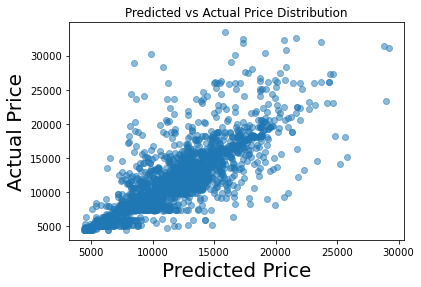

In [82]:
plt.scatter(pred,y_test,alpha=0.5)
plt.xlabel('Predicted Price',fontsize=20)
plt.ylabel('Actual Price',fontsize=20)
plt.title('Predicted vs Actual Price Distribution')

In [91]:
#Lets save the submission to csv
result.to_csv("Flight_price_pred.csv",index=False)

#### Saving the model

In [92]:
#saving the model
import joblib
model=joblib.dump(random_grid,'flight_price.obj')

#### Conclusions :


- The prediction of Flight price we find out that the  Price is Correlated with the 
    1. Duration of the flight
    2. Number of stops between the flights
    
    
- That Means if the Duration of the flight is more the price of the flights increases and also when the number of stops is more the price also increases in that case.

- Airfares move in small increments .

- The ticket-fares tend to go up with time.

- Near the departure date flight prices are very high.

- The best time to buy a cheap ticket to get less risk is to buy 10-20 days earlier of travelling date or more earlier than that 1 month before is also good.

- Air India and vistara flights tickets are very expensive.

- The early morning flights are less expensive, after that increases.

- In this project we use different models like Linear Regression, Lasso, Ridge, SVR, KNN Regression and Random Forest Regression.

- Here we select the RandomForestRegressor model for our final model training and testing as it gives the R2 score which is highest among the all models we choose.
